In [1]:
"""S Suprabath Reddy
EE15BTECH11026
"""

"""Python 3.5"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model


train = pd.read_csv("training_data.csv")
test = pd.read_csv("testing_data.csv")

f = open('result.csv', 'w')
f.write("Machine Learning Technique,Mean Absolute Error\n")

print("Number of instances in dataset = {}".format(train.shape[0]))
print("Total number of columns = {}".format(train.columns.shape[0]))
print("Column wise count of null values:-")
print(train.isnull().sum())

Number of instances in dataset = 15264
Total number of columns = 27
Column wise count of null values:-
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64


In [2]:
temp_cols = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9"] #Columns for temperature sensors
rho_cols = ["RH_1", "RH_2", "RH_3", "RH_4", "RH_5", "RH_6", "RH_7", "RH_8", "RH_9"] #Columns for humidity sensors
weather_cols = ["T_out", "Tdewpoint", "RH_out", "Press_mm_hg", "Windspeed", "Visibility"] #Columns for weather data
target = ["Appliances"]  #Target variable column

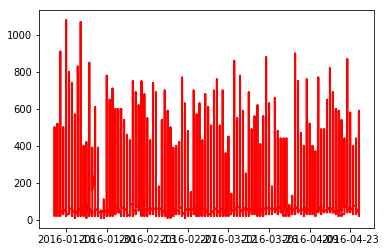

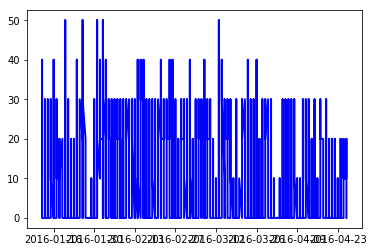

In [3]:
train['date'] = pd.to_datetime(train['date'])
train['just_date'] = train['date'].dt.date

plt.plot(train['just_date'],train['Appliances'],color = 'red', linewidth=2, linestyle="-" )
plt.show()
plt.plot(train['just_date'],train['lights'],color = 'blue', linewidth=2, linestyle="-" )
plt.show()

train = train.drop(["just_date","date","lights"], axis=1)

In [4]:
train[temp_cols].describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9
count,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000
mean,21.152644,19.645445,21.575486,20.153001,18.958487,6.152260,19.564421,21.474501,18.767674
std,1.225767,1.520170,1.512331,1.530607,1.311563,4.711561,1.597267,1.717919,1.445634
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000
25%,20.463333,18.600000,20.500000,19.200000,18.000000,2.863333,18.500000,20.390000,17.790000
50%,21.290000,19.566667,21.633333,20.290000,18.890000,6.090000,19.533333,21.700000,18.600000
75%,22.033333,20.633333,22.600000,21.230000,20.000000,9.390000,20.890000,22.730000,20.050000
max,24.100000,24.600000,27.600000,23.760000,22.967778,21.290000,23.566667,25.200000,23.840000


In [5]:
train[rho_cols].describe()

,RH_1,RH_2,RH_3,RH_4,RH_5,RH_6,RH_7,RH_8,RH_9
count,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000
mean,40.147432,40.648161,39.443947,39.011256,51.414795,63.654182,35.152151,42.917032,41.555932
std,3.549504,3.367031,3.159183,4.258235,8.955720,27.641212,5.011035,5.246468,3.994293
min,27.733333,25.763333,32.626667,27.660000,35.363333,1.000000,23.200000,29.600000,31.033333
25%,37.500000,38.392500,37.100000,35.566667,45.790000,44.696667,31.426667,39.036500,38.590000
50%,39.666667,40.693333,38.790000,38.400000,49.183611,68.026667,34.590000,42.431389,40.805714
75%,42.790000,43.200000,41.860000,41.966667,54.000000,87.866667,38.530000,46.360000,44.090000
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667


In [6]:
train[weather_cols].describe()

,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility
count,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000,15264.000000
mean,5.870869,2.744176,81.826815,755.479809,4.290881,38.687303
std,4.171170,3.557876,12.939027,7.828836,2.575784,12.519245
min,-5.000000,-6.600000,31.000000,729.300000,0.000000,1.000000
25%,2.933333,0.400000,73.166667,750.533333,2.000000,29.000000
50%,5.800000,2.800000,85.333333,756.100000,4.000000,40.000000
75%,8.900000,5.266667,92.000000,761.600000,6.000000,40.000000
max,19.700000,11.400000,100.000000,772.300000,14.000000,66.000000


In [7]:
train[target].describe()

,Appliances
count,15264.000000
mean,98.166929
std,105.619574
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


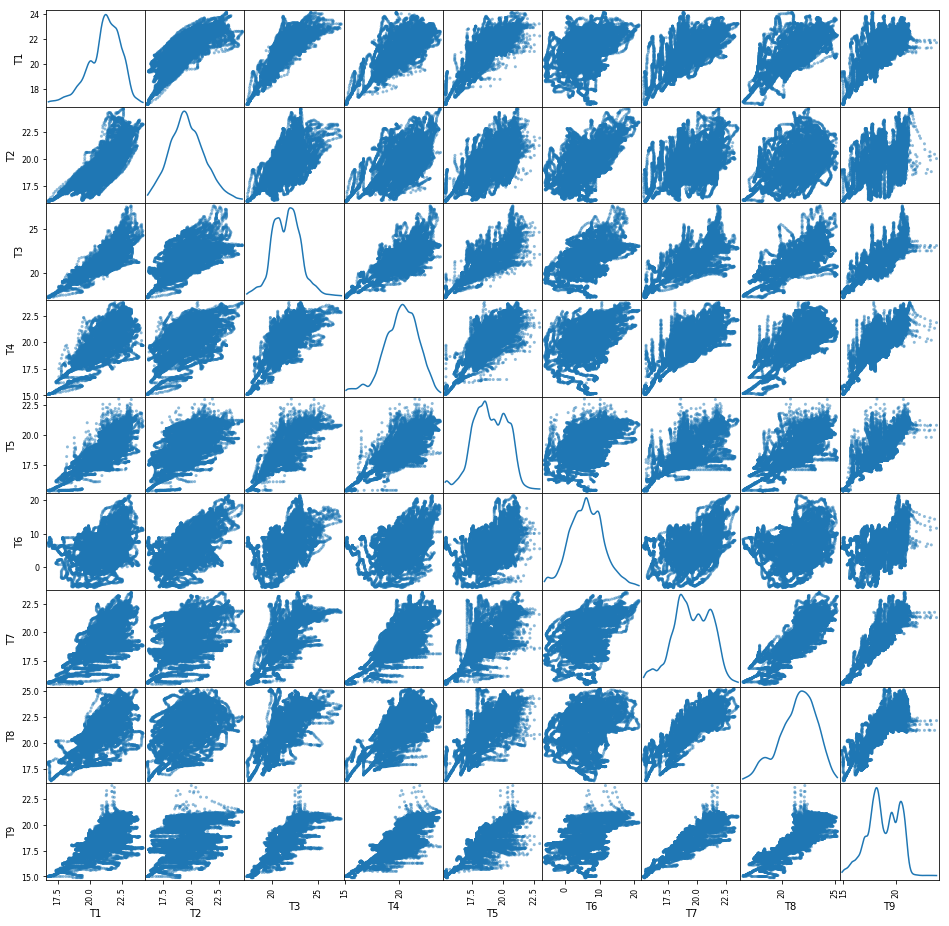

In [8]:
temp_scatter = pd.plotting.scatter_matrix(train[temp_cols], diagonal="kde", figsize=(16, 16))

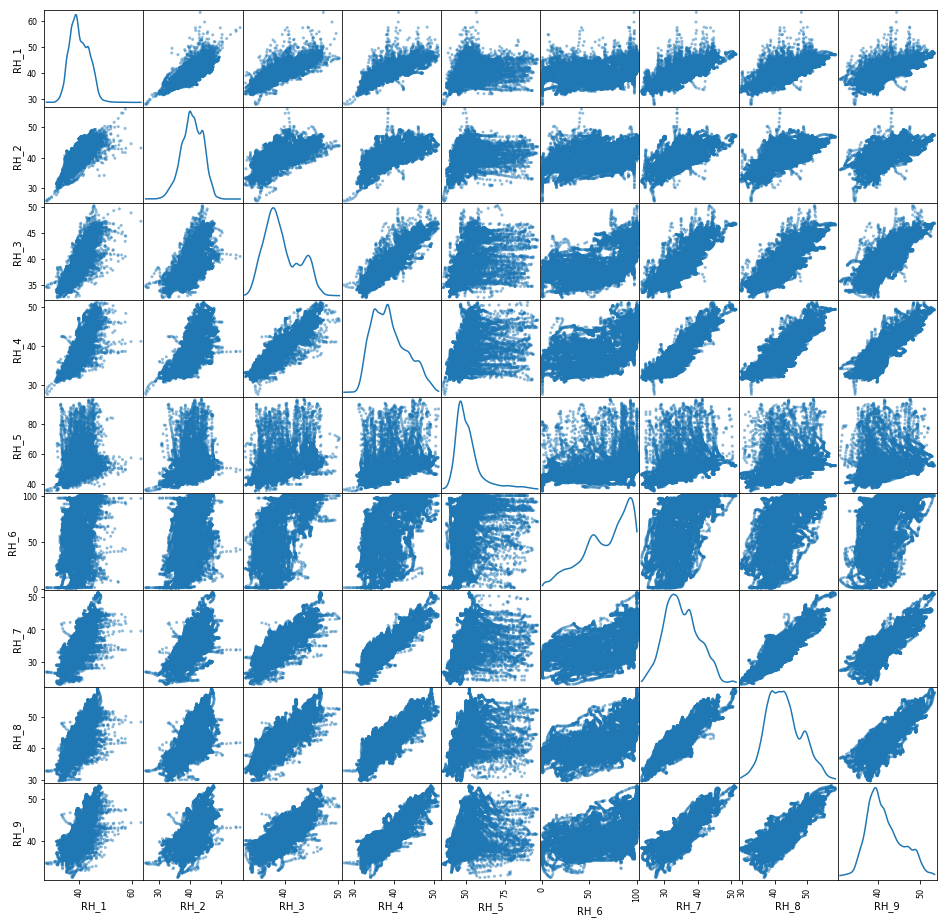

In [9]:
rho_scatter = pd.plotting.scatter_matrix(train[rho_cols], diagonal="kde", figsize=(16, 16))

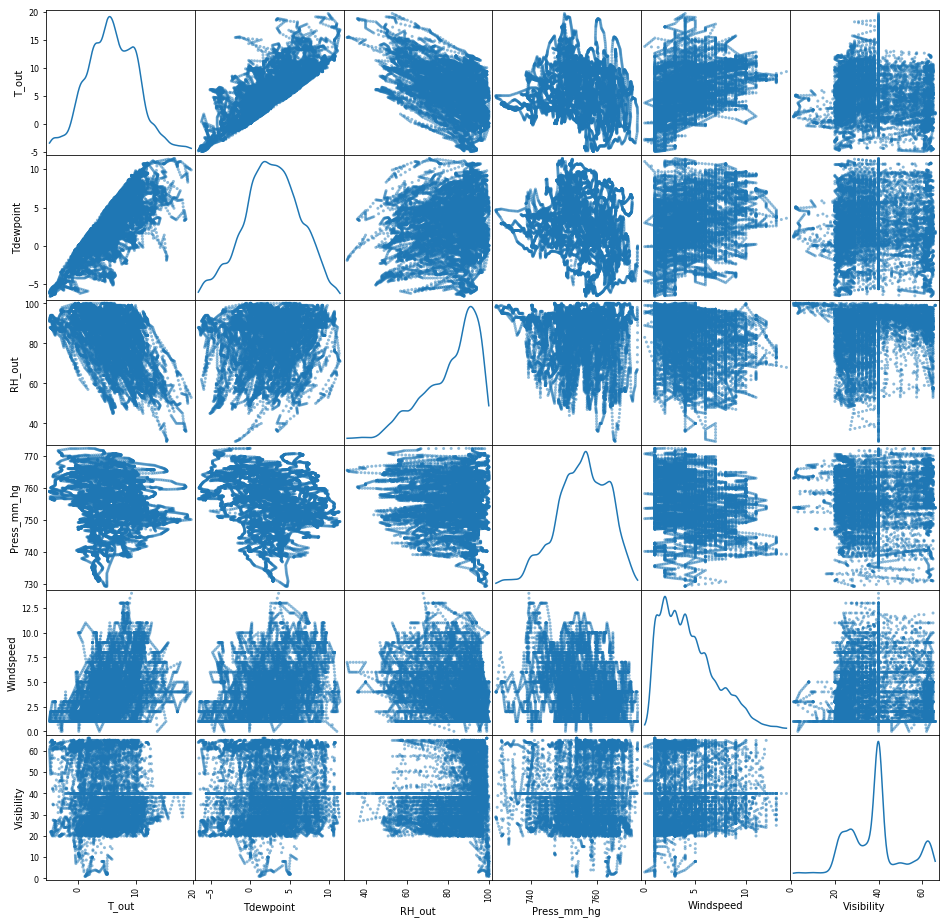

In [17]:
weather_scatter = pd.plotting.scatter_matrix(train[weather_cols], diagonal="kde", figsize=(16, 16))



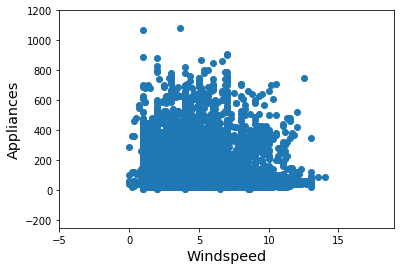

In [11]:
plt.xlabel("Windspeed", fontsize='x-large')
plt.ylabel("Appliances", fontsize='x-large')
plt.xlim(-5, train.Windspeed.max() + 5)
plt.ylim(-250, 1200)
plt.scatter(train["Windspeed"], train["Appliances"])
plt.show()

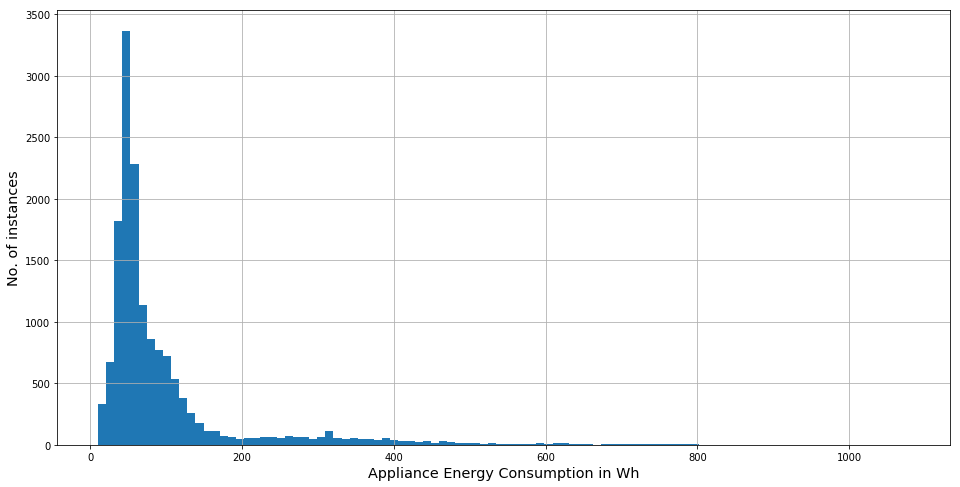

In [12]:
plt.xlabel("Appliance Energy Consumption in Wh", fontsize="x-large")
plt.ylabel("No. of instances", fontsize="x-large")
train["Appliances"].hist(figsize=(16, 8), bins=100)

In [13]:
print("Percentage of dataset in range of 0-200 Wh")
print("{:.3f}%".format((train[train.Appliances <= 200]["Appliances"].count()*100.0) /train.shape[0]))

Percentage of dataset in range of 0-200 Wh
89.891%


In [14]:
from scipy.stats import pearsonr

#Calculate the coefficient and p-value between T7 and T9
corr_coef, p_val = pearsonr(train["T7"], train["T9"])
print("Correlation coefficient : {}".format(corr_coef))
print("p-value : {}".format(p_val))

Correlation coefficient : 0.8871912999102088
p-value : 0.0


In [15]:
from itertools import combinations

for pair in combinations(train.columns, 2):
    col_1, col_2 = pair
    corr_coef, p_val = pearsonr(train[col_1], train[col_2])
    # Check for high correlation
    if corr_coef > 0.9 or corr_coef < -0.9:
        print("Column pair : {}, {}".format(*pair))
        print("Correlation coefficient : {}".format(corr_coef))
        print("p-value : {}".format(p_val))

Column pair : RH_3, RH_4
Correlation coefficient : 0.9025064570996248
p-value : 0.0
Column pair : T6, T_out
Correlation coefficient : 0.9722317157145699
p-value : 0.0


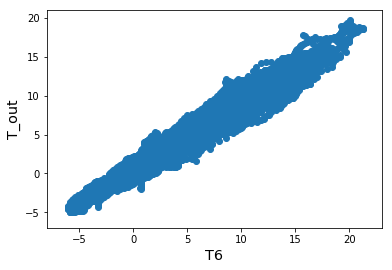

In [16]:
plt.xlabel("T6", fontsize='x-large')
plt.ylabel("T_out", fontsize='x-large')

plt.xlim(int(train.T6.min()) - 2, int(train.T6.max()) + 2)
plt.ylim(int(train.T_out.min()) - 2, int(train.T_out.max()) + 2)

plt.scatter(train["T6"], train["T_out"])
plt.show()


In [19]:
#Starting Linear Regression

#Removing correlated features T6 and RH4

X_train = train.drop(["T6", "RH_4"], axis=1)
X_test = test.drop(["T6", "RH_4"], axis=1)

X_train.drop(["Appliances"], axis=1, inplace=True)
y_train = train["Appliances"]

X_test.drop(["Appliances", "date","lights"], axis=1, inplace=True)
y_test = test["Appliances"]

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()
reg = model.fit(X_train, y_train)

y_predict = reg.predict(X_test)

error_lin = np.sqrt(metrics.mean_absolute_error(y_test,y_predict))
print (error_lin)
f.write("Linear Regression" + ',' + str(error_lin) + '\n')


7.162005859072302


36

In [21]:
from sklearn.linear_model import Ridge

ridgereg = Ridge()
ridgereg.fit(X_train,y_train)
y_pred = ridgereg.predict(X_test)

error_reg = np.sqrt(metrics.mean_absolute_error(y_test,y_predict))
print (error_reg)
f.write("Ridge Regression" + ',' + str(error_reg) + '\n')

7.162005859072302


35

In [22]:
from sklearn import ensemble

model = ensemble.ExtraTreesRegressor(n_jobs=5, random_state=0)
reg.fit(X_train, y_train)

y_predict = reg.predict(X_test)

error_tree = np.sqrt(metrics.mean_absolute_error(y_test,y_predict))
print (error_tree)
f.write("Extra Trees Regressor" + ',' + str(error_tree) + '\n')

7.162005859072302


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


40